In [1]:
# 대학평가
import pandas as pd
df = pd.read_csv('../data/school/data.csv')
df.head()

,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,total_score,Label
0,12.4,95.6,10.6,13.3,33.3,5226,14.1,0.82,59.8,0
1,29.9,90.1,20.1,65.3,33.9,2473,15.6,0.63,59.8,0
2,24.7,82.6,18.9,43.5,28.4,2473,15.6,0.63,59.8,0
3,61.3,98.6,67.5,94.6,65.4,9666,10.5,0.54,76.1,1
4,62.4,98.8,57.0,95.0,49.8,9666,10.5,0.54,73.0,1


In [2]:
train_cols = df.columns[0:8]
print(train_cols)
X = df[train_cols]
y = df['Label']

Index(['teaching', 'international', 'research', 'citations', 'income',
       'num_students', 'student_staff_ratio', 'international_students'],
      dtype='object')


In [3]:
df["Label"].value_counts()

0    2158
1     445
Name: Label, dtype: int64

c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 나쁨, 1: 좋음)')

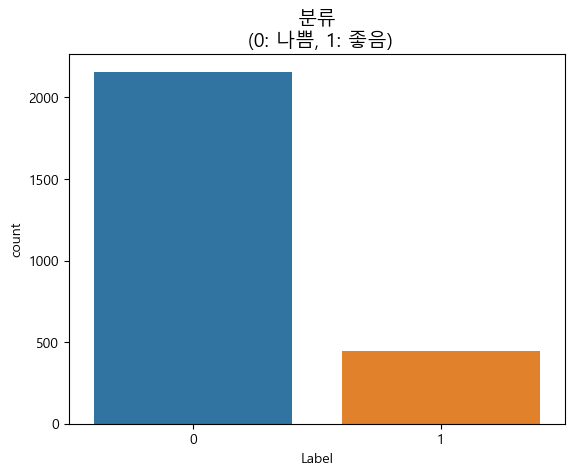

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import seaborn as sns

sns.countplot('Label', data=df)
plt.title('분류\n (0: 나쁨, 1: 좋음)', fontsize=14)

In [5]:
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Label'])
df_samp = pd.concat([X_samp, y_samp], axis=1)
df_samp['Label'].value_counts()

0    445
1    445
Name: Label, dtype: int64

In [6]:
X = df_samp[train_cols]
y = df_samp['Label']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

로지스틱 회귀분석

In [8]:
# 로지스틱 회귀분석
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state=10, max_iter=1000)
logit.fit(X_train, y_train)
print("학습용 :", logit.score(X_train, y_train))
print("검증용 :", logit.score(X_test, y_test))

학습용 : 0.8862359550561798
검증용 : 0.8651685393258427


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

In [10]:
# 다양한 알고리즘별 정확도를 저장할 리스트
result_tr = []
result_te = []

In [11]:
logit = LogisticRegression(random_state=10)
logit.fit(X_train_scaled, y_train)
score_tr = logit.score(X_train_scaled, y_train)
score_te = logit.score(X_test_scaled, y_test)
print("학습용 :", score_tr)
print("검증용 :", score_te)
result_tr.append(score_tr)
result_te.append(score_te)

학습용 : 0.9887640449438202
검증용 : 0.9943820224719101


의사결정나무

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=10)
tree.fit(X_train_scaled, y_train)
print("학습용 :", logit.score(X_train_scaled, y_train))
print("검증용 :", logit.score(X_test_scaled, y_test))

학습용 : 0.9887640449438202
검증용 : 0.9943820224719101


In [13]:
# max_depth 가지치기
tree = DecisionTreeClassifier(max_depth=4, random_state=10)
tree.fit(X_train_scaled, y_train)
score_tr = tree.score(X_train_scaled, y_train)
score_te = tree.score(X_test_scaled, y_test)
print("학습용 :", score_tr)
print("검증용 :", score_te)
result_tr.append(score_tr)
result_te.append(score_te)


학습용 : 0.9789325842696629
검증용 : 0.9775280898876404


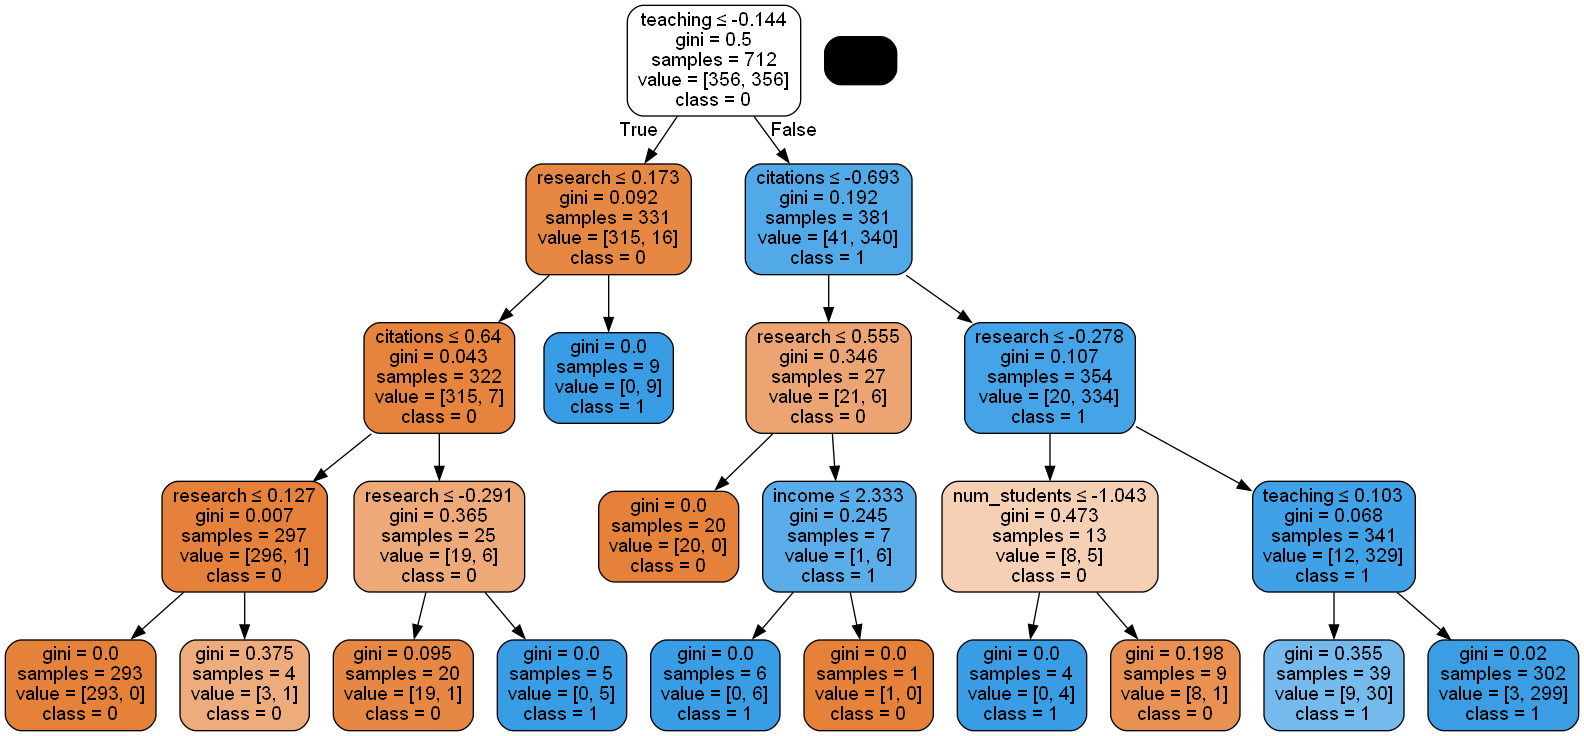

In [14]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
dot_data = export_graphviz(tree, out_file=None, feature_names=train_cols, class_names=["0", "1"],
                           filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

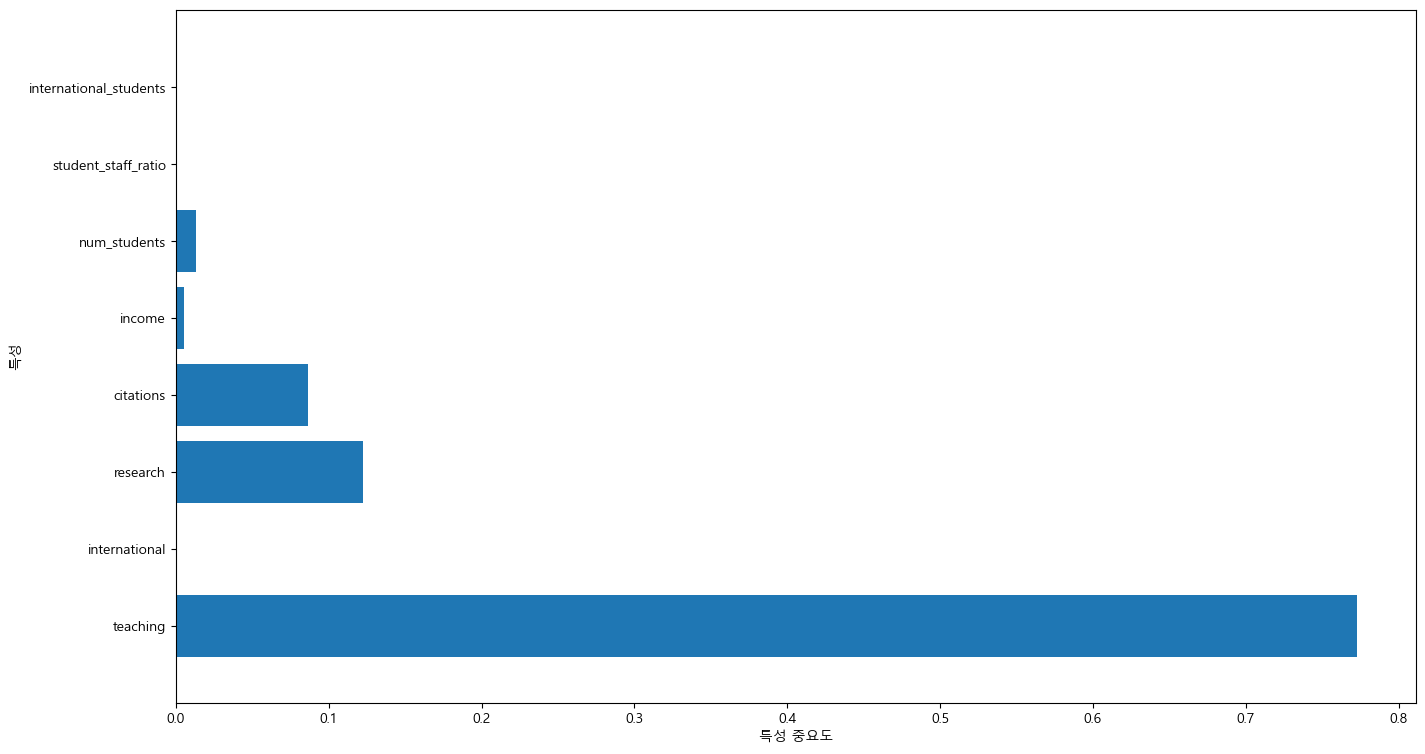

In [15]:
# 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성 중요도 적용
# 0 ~ 1 사이의 값(0 전혀 사용되지 않음 ~ 1 완벽하게 타겟 클래스 예측)
import numpy as np
def plot_tree(model):
    n_features = X.shape[1]
    plt.rcParams["figure.figsize"] = (16, 9)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train_cols)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
plot_tree(tree)

랜덤포레스트

In [16]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
# 100개의 트리로 구성된 랜덤 포레스트
forest = RandomForestClassifier(n_estimators=100, random_state=10)
forest.fit(X_train_scaled, y_train)
score_tr = forest.score(X_train_scaled, y_train)
score_te = forest.score(X_test_scaled, y_test)
print("학습용 :", score_tr)
print("검증용 :", score_te)
result_tr.append(score_tr)
result_te.append(score_te)

학습용 : 1.0
검증용 : 0.9943820224719101


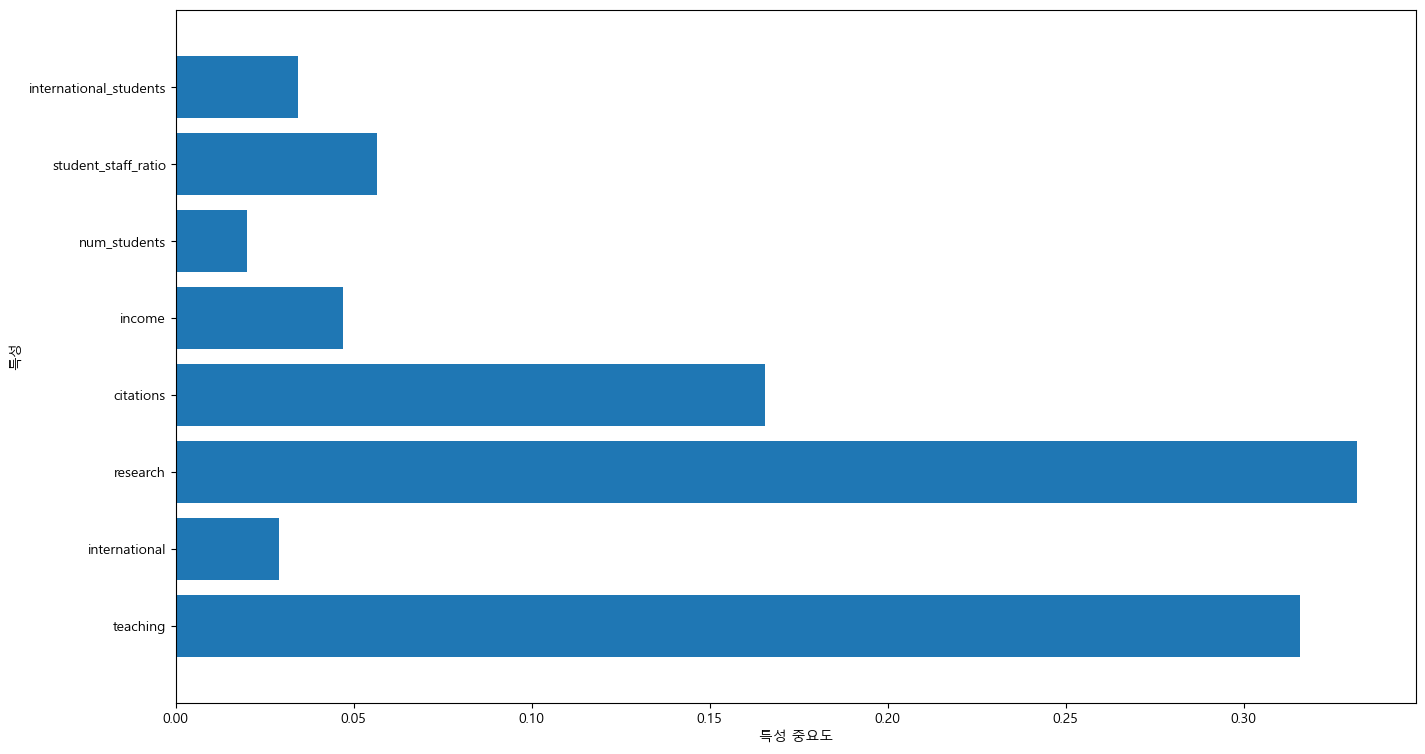

In [17]:
# 랜덤 포레스트에서 제공하는 각 트리의 특성 중요도
# 랜덤 포레스트는 좀 더 폭넓은 시각으로 데이터를 관찰할 수 있다.
plot_tree(forest)

KNN

In [18]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
train_rate = []
test_rate = []
# 새로운 데이터 포인트에 가장 가까운 k개의 이웃을 찾는다.
# k의 값에 따라 결과가 달라지므로 어떤 값이 최적인지 찾아내는 것이 필요함.
# 1 ~ 10 까지 n_neighbors 적용
neighbors = range(1, 11)
for n in neighbors:
    # 모델 생성
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)
    # 학습용 데이터셋의 정확도
    train_rate.append(knn.score(X_train_scaled, y_train))
    # 검증용 데이터셋의 정확도
    test_rate.append(knn.score(X_test_scaled, y_test))
test_arr = np.array(test_rate) # 검증용 데이터셋의 정확도
max_rate = np.max(test_arr) # 가장 좋은 정확도
idx = np.where(test_arr == max_rate)[0][0] # 가장 성능이 좋은 인덱스
print("최적의 k :", neighbors[idx])
print("최고 정확도 :", test_rate[idx])

최적의 k : 5
최고 정확도 : 0.9887640449438202


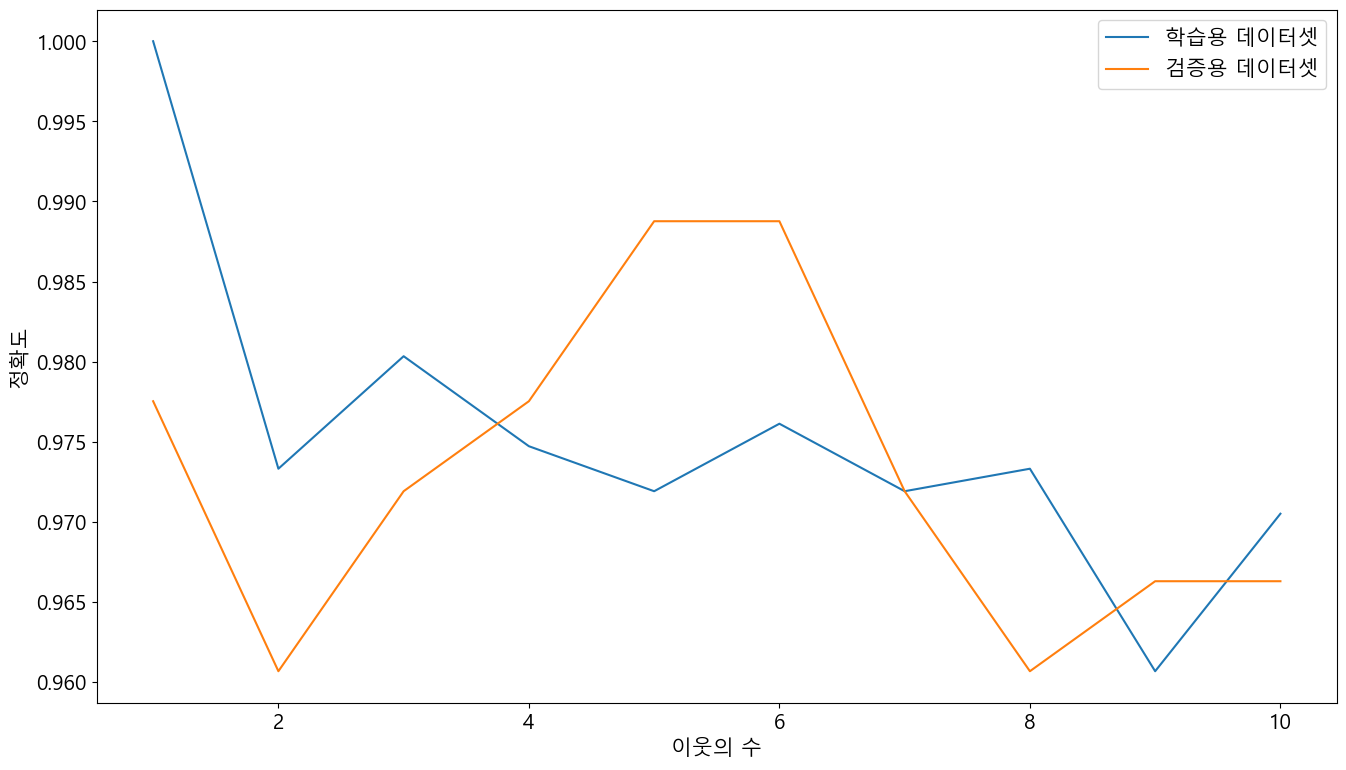

In [19]:
plt.rcParams["font.size"] = 15
plt.plot(neighbors, train_rate, label="학습용 데이터셋")
plt.plot(neighbors, test_rate, label="검증용 데이터셋")
plt.ylabel("정확도")
plt.xlabel("이웃의 수")
plt.legend()
# 학습용 데이터셋의 경우 이웃이 1개일 때 100% 예측
# 이웃의 수가 늘어나면 학습용 데이터셋의 경우 모델이 단순해지고 정확도는 줄어든다.

In [20]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
score_tr = knn.score(X_train_scaled, y_train)
score_te = knn.score(X_test_scaled, y_test)
print("학습용 :", score_tr)
print("검증용 :", score_te)
result_tr.append(score_tr)
result_te.append(score_te)


학습용 : 0.9803370786516854
검증용 : 0.9719101123595506


인공신경망(사이킷런)

In [21]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=10)
mlp.fit(X_train_scaled, y_train)
score_tr = mlp.score(X_train_scaled, y_train)
score_te = mlp.score(X_test_scaled, y_test)
print("학습용 :", score_tr)
print("검증용 :", score_te)
result_tr.append(score_tr)
result_te.append(score_te)

학습용 : 0.9943820224719101
검증용 : 0.9943820224719101


SVM

In [22]:
from sklearn.svm import SVC
svm = SVC(random_state=10)
svm.fit(X_train_scaled, y_train)
score_tr = svm.score(X_train_scaled, y_train)
score_te = svm.score(X_test_scaled, y_test)

In [23]:
# 최적의 C value와 gamma value를 찾는 과정
import numpy as np
train_rate = []
test_rate = []
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
g_values = [0.0001, 0.001, 0.01, 0.1]
for n in c_values:
    for g in g_values:
        # 모델 생성
        svm = SVC(C=n , gamma=g, random_state=10)
        svm.fit(X_train_scaled, y_train)
        # 학습용 데이터셋의 정확도
        train_rate.append([n, g, svm.score(X_train_scaled, y_train)])
        # 검증용 데이터셋의 정확도
        test_rate.append([n, g, svm.score(X_test_scaled, y_test)])
train_arr = np.array(train_rate) # 학습용 데이터셋의 정확도
test_arr = np.array(test_rate) # 검증용 데이터셋의 정확도
max_rate = np.max(test_arr[:, 2]) # 가장 좋은 정확도
idx = np.argmax(test_arr[:, 2]) # 가장 성능이 좋은 인덱스
print("최적의 c:",test_rate[idx][0])
print("최적의 gamma:",test_rate[idx][1])
print("최고 정확도:",test_rate[idx][2])

최적의 c: 100
최적의 gamma: 0.01
최고 정확도: 1.0


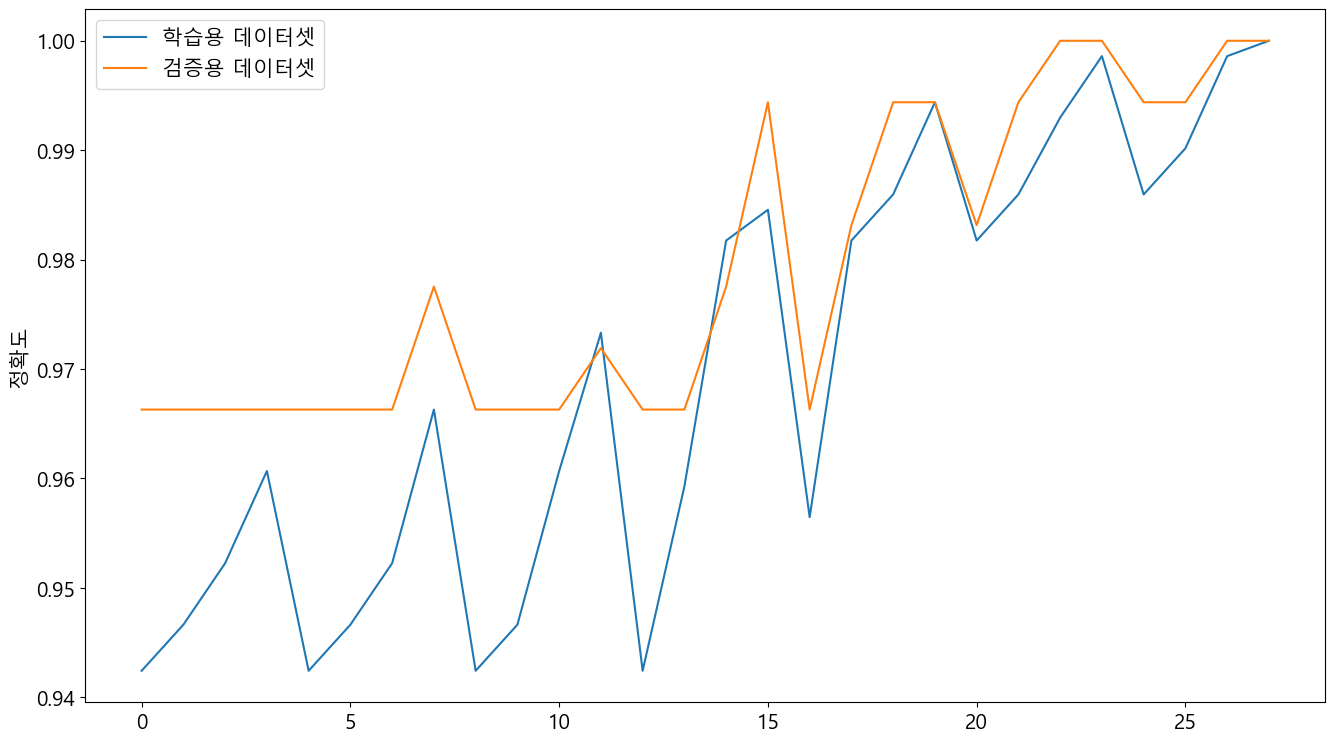

In [24]:
plt.rcParams["font.size"] = 15
plt.plot(range(len(train_rate)), train_arr[:, 2], label="학습용 데이터셋")
plt.plot(range(len(test_rate)), test_arr[:, 2], label="검증용 데이터셋")
plt.ylabel("정확도")
plt.legend()

In [25]:
from sklearn.svm import SVC
svm = SVC(C=100, gamma=0.01, random_state=10)
svm.fit(X_train_scaled, y_train)
score_tr = svm.score(X_train_scaled, y_train)
score_te = svm.score(X_test_scaled, y_test)
print("학습용 :", score_tr)
print("검증용 :", score_te)
result_tr.append(score_tr)
result_te.append(score_te)

학습용 : 0.9929775280898876
검증용 : 1.0


인공신경망(케라스)

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(64,input_shape=(X.shape[1],),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
# sgd = SGD(learning_rate=0.01)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
es = EarlyStopping(monitor='val_loss', patience=5)

# 학습 과정에서 만들어진 최적의 파라미터 조합으로 모형을 저장
mc = ModelCheckpoint("school_best.h5", save_best_only=True)

# 학습이 잘 안될 때 학습률을 동적으로 조절하는 옵션
rlr = ReduceLROnPlateau(factor=0.1, patience=5) #기존 학습률*factor (배수)

# 학습 과정의 주요 history를 csv로 저장
csvlogger = CSVLogger("mylog.csv")  

hist = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=500, callbacks=[es, mc, rlr, csvlogger])

Epoch 1/500
18/18 [==============================] - 1s 23ms/step - loss: 0.6520 - accuracy: 0.5993 - val_loss: 0.4827 - val_accuracy: 0.8601 - lr: 0.0010
Epoch 2/500
18/18 [==============================] - 0s 16ms/step - loss: 0.4077 - accuracy: 0.8770 - val_loss: 0.3082 - val_accuracy: 0.9231 - lr: 0.0010
Epoch 3/500
18/18 [==============================] - 0s 17ms/step - loss: 0.2711 - accuracy: 0.9385 - val_loss: 0.2030 - val_accuracy: 0.9790 - lr: 0.0010
Epoch 4/500
18/18 [==============================] - 0s 17ms/step - loss: 0.1904 - accuracy: 0.9385 - val_loss: 0.1393 - val_accuracy: 0.9860 - lr: 0.0010
Epoch 5/500
18/18 [==============================] - 0s 15ms/step - loss: 0.1427 - accuracy: 0.9613 - val_loss: 0.1072 - val_accuracy: 0.9930 - lr: 0.0010
Epoch 6/500
18/18 [==============================] - 0s 17ms/step - loss: 0.1126 - accuracy: 0.9719 - val_loss: 0.0856 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 7/500
18/18 [==============================] - 0s 16ms/step - lo

In [28]:
loss, acc_tr = model.evaluate(X_train_scaled, y_train, verbose=0)
loss, acc_te = model.evaluate(X_test_scaled, y_test, verbose=0)
print(acc_tr)
print(acc_te)
result_tr.append(acc_tr)
result_te.append(acc_te)

1.0
1.0


알고리즘별 예측도 그래프

['LOGIT', 'Tree', 'RF', 'KNN', 'ANN', 'SVM', 'DNN']
[0.9887640449438202, 0.9789325842696629, 1.0, 0.9803370786516854, 0.9943820224719101, 0.9929775280898876, 1.0]
[0.9943820224719101, 0.9775280898876404, 0.9943820224719101, 0.9719101123595506, 0.9943820224719101, 1.0, 1.0]
최적의 모형(학습용) : RF
최고 정확도(학습용) : 1.0
최적의 모형(검증용) : SVM
최고 정확도(검증용) : 1.0


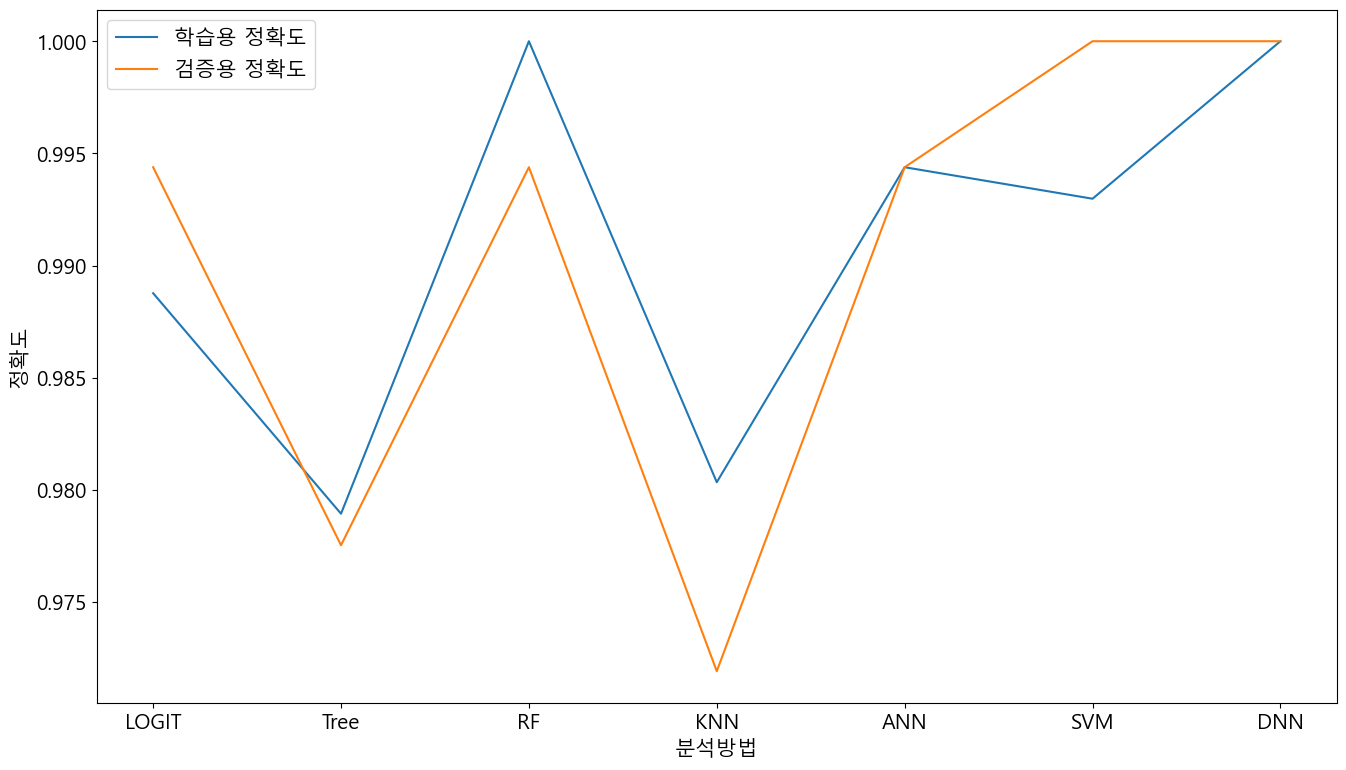

In [29]:
methods = ["LOGIT", "Tree", "RF", "KNN", "ANN", "SVM", "DNN"]
result_tr_arr = np.array(result_tr) #검증용 데이터셋의 정확도
max_rate_tr = np.max(result_tr_arr) #가장 좋은 정확도
idx_tr = np.argmax(result_tr_arr) #가장 성능이 좋은 인덱스
result_te_arr = np.array(result_te) #검증용 데이터셋의 정확도
max_rate_te = np.max(result_te_arr) #가장 좋은 정확도
idx_te = np.argmax(result_te_arr) #가장 성능이 좋은 인덱스
print(methods)
print(result_tr)
print(result_te)
print("최적의 모형(학습용) :", methods[idx_tr])
print("최고 정확도(학습용) :", max_rate_tr)
print("최적의 모형(검증용) :", methods[idx_te])
print("최고 정확도(검증용) :", max_rate_te)

plt.rcParams["font.size"]=15
plt.plot(methods, result_tr_arr, label="학습용 정확도")
plt.plot(methods, result_te_arr, label="검증용 정확도")
plt.xlabel("분석방법")
plt.ylabel("정확도")
plt.legend()